In [4]:
import os
os.chdir('..')

In [16]:
from utils.time_series import Indicators, BasicTSTransformer
import yfinance as yf
import pandas as pd

In [17]:
ticker = yf.Ticker('DNN')

In [31]:
df = ticker.history('5y')[252*2:]

In [32]:
df.to_csv("DNN.csv")

In [33]:
df['Stock Splits'].sum()

0.0

In [34]:
BT = BasicTSTransformer()
Ind = Indicators()
ts_rets = BT.log_returns(df['Close'])

In [36]:
ts_rets

Date
2021-11-02 00:00:00-04:00    0.000000
2021-11-03 00:00:00-04:00    0.081346
2021-11-04 00:00:00-04:00    0.010363
2021-11-05 00:00:00-04:00   -0.005168
2021-11-08 00:00:00-05:00    0.074848
                               ...   
2024-10-28 00:00:00-04:00    0.018100
2024-10-29 00:00:00-04:00   -0.031893
2024-10-30 00:00:00-04:00   -0.004640
2024-10-31 00:00:00-04:00   -0.023531
2024-11-01 00:00:00-04:00    0.021202
Name: Close, Length: 755, dtype: float64

In [119]:
es_2 = Ind.smoothed_rsi(ts_rets, 2)[30:] 
es_5 = Ind.smoothed_rsi(ts_rets, 5)[30:] - 50
es_10 = Ind.smoothed_rsi(ts_rets, 10)[30:] - 50
es_20 = Ind.smoothed_rsi(ts_rets, 20)[30:]- 50
es_30 = Ind.smoothed_rsi(ts_rets, 30)[30:] - 50

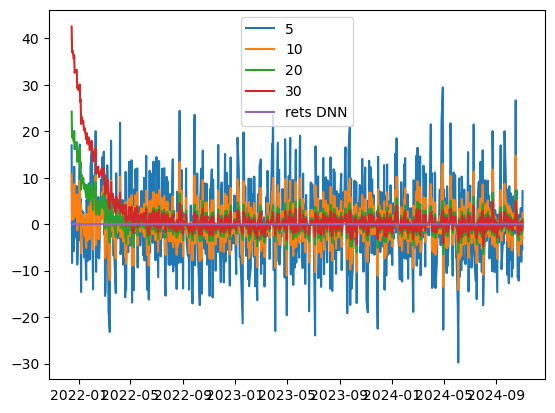

In [104]:
import matplotlib.pyplot as plt
plt.plot(es_5,label = "5")
plt.plot(es_10, label = "10")
plt.plot(es_20, label = '20')
plt.plot(es_30,label = '30')
plt.plot(ts_rets[30:], label = "rets DNN")
plt.legend()
plt.show()

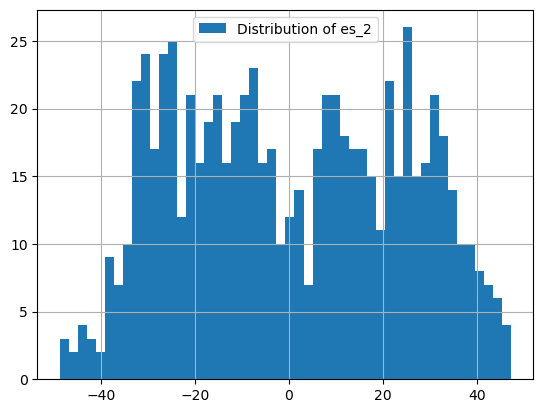

In [108]:
es_2.hist(bins = 50,label ="Distribution of es_2")
plt.legend()
plt.show()

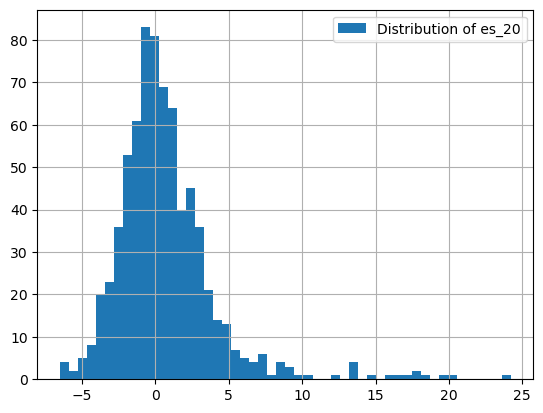

In [110]:
es_20.hist(bins = 50,label ="Distribution of es_20")
plt.legend()
plt.show()

In [125]:
import numpy as np
X = -np.log(2/(1 + 0.009999999 * (2*es_2 -100))-1)
Y = es_20

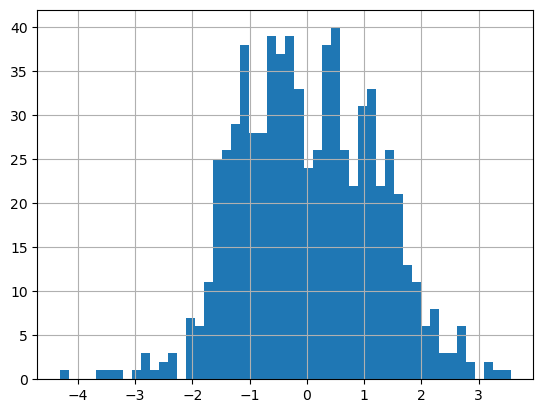

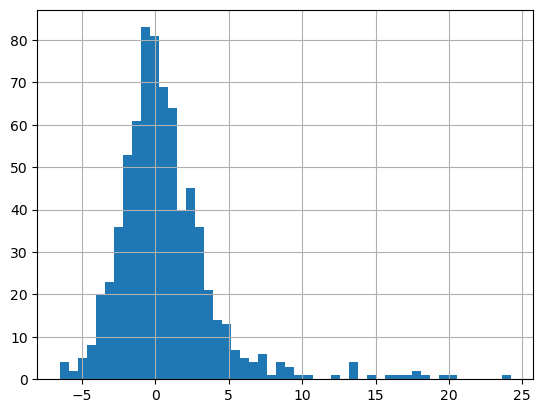

In [127]:
x.hist(bins = 50)
plt.show()
Y.hist(bins = 50)
plt.show()

In [149]:
#Need to be dealt with later on
outliers = df['Close'][Y[Y > 12].index] 
outliers.index


DatetimeIndex(['2021-12-15 00:00:00-05:00', '2021-12-16 00:00:00-05:00',
               '2021-12-17 00:00:00-05:00', '2021-12-20 00:00:00-05:00',
               '2021-12-21 00:00:00-05:00', '2021-12-22 00:00:00-05:00',
               '2021-12-23 00:00:00-05:00', '2021-12-27 00:00:00-05:00',
               '2021-12-28 00:00:00-05:00', '2021-12-29 00:00:00-05:00',
               '2021-12-30 00:00:00-05:00', '2021-12-31 00:00:00-05:00',
               '2022-01-03 00:00:00-05:00', '2022-01-04 00:00:00-05:00',
               '2022-01-05 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', freq=None)

In [150]:
outliers

Date
2021-12-15 00:00:00-05:00    1.47
2021-12-16 00:00:00-05:00    1.39
2021-12-17 00:00:00-05:00    1.39
2021-12-20 00:00:00-05:00    1.33
2021-12-21 00:00:00-05:00    1.43
2021-12-22 00:00:00-05:00    1.40
2021-12-23 00:00:00-05:00    1.44
2021-12-27 00:00:00-05:00    1.52
2021-12-28 00:00:00-05:00    1.45
2021-12-29 00:00:00-05:00    1.40
2021-12-30 00:00:00-05:00    1.40
2021-12-31 00:00:00-05:00    1.37
2022-01-03 00:00:00-05:00    1.51
2022-01-04 00:00:00-05:00    1.51
2022-01-05 00:00:00-05:00    1.58
Name: Close, dtype: float64

In [155]:
np.mean(df['Close'].values)

1.5036754961834837

In [170]:
import torch


ValueError: module functions cannot set METH_CLASS or METH_STATIC